# [자연어처리]
# 6주차(6-1). 차원 축소(3)

# 202002961 김현주

> ## 중간 중간 **'### ... 이 부분을 완성하시오'** 라는 부분의 코드를 완성해 보기 바랍니다. (강의 자료를 참고하여 '???' 부분을 작성해 보시기 바랍니다.)




---

## TF-IDF

In [ ]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

# 문자열들의 리스트
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
vocab

['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']

In [ ]:
# 총 문서의 수
N = len(docs)

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log((N+1)/(df+1))+1

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [ ]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

In [ ]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,1.916291
길고,1.916291
노란,1.916291
먹고,1.510826
바나나,1.510826
사과,1.916291
싶은,1.510826
저는,1.916291
좋아요,1.916291


In [ ]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,1.510826,0.000000,1.916291,1.510826,0.000000,0.000000
1,0.000000,0.000000,0.000000,1.510826,1.510826,0.000000,1.510826,0.000000,0.000000
2,0.000000,1.916291,1.916291,0.000000,3.021651,0.000000,0.000000,0.000000,0.000000
3,1.916291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.916291,1.916291


---

## 데이터 셋 준비 (우리에게 익숙한 20newsgroups)

In [1]:
from sklearn.datasets import fetch_20newsgroups

#20개의 토픽 중 선택하고자 하는 토픽을 리스트로 생성
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

#학습 데이터셋을 가져옴
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로 분류
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
#검증 데이터셋을 가져옴
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

X_train = newsgroups_train.data   #학습 데이터셋
y_train = newsgroups_train.target #학습 데이터셋

X_test = newsgroups_test.data     #검증 데이터셋
y_test = newsgroups_test.target   #검증 데이터셋

전처리
* 토큰화, 불용어처리, 스테밍


In [2]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴
stemmer = PorterStemmer() # 스테머로 포터스테머 사용

def my_tokenizer(text):
    tokens = RegTok.tokenize(text)
    # stopwords 제외
    words = [word for word in tokens if word not in english_stops]
    # portr stemmer 적용
    features = [stemmer.stem(token) for token in words]
    return features

In [4]:
# 약간의 시간(약 30초)이 소요됩니다.
from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer(tokenizer=my_tokenizer, max_features=2000, min_df=5, max_df=0.5)
# 토큰화 외에 아무것도 적용하지 않은 채로 확인
tfidf = TfidfVectorizer(tokenizer=my_tokenizer)
X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환
X_test_tfidf = tfidf.transform(X_test) # test set을 변환

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
print('Original tfidf matrix shape:', X_train_tfidf.shape)

Original tfidf matrix shape: (2034, 20085)


In [ ]:
y

---

## tSNE를 이용한 시각화와 차원축소의 효과


 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
from sklearn.manifold import TSNE

# tfidf = TfidfVectorizer(tokenizer=my_tokenizer)
# X_train_tfidf = tfidf.fit_transform(X_train) # train set을 변환

tsne = TSNE(n_components=2, random_state=7, init="random") ### ... 이 부분을 완성하시오 (강의 자료를 참고하여 '???' 부분을 작성해 보시기 바랍니다.)
tsne_tfidf = tsne.fit_transform(X_train_tfidf)
print('TSNE dimension:', tsne_tfidf.shape)

TSNE dimension: (2034, 2)


In [ ]:
def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}

    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용

    plt.figure(figsize=(15,10))

    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]

    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])

    #for i in range(500):
    for i in range(len(x)):
        #각 값에 대해 y값 즉 label에 따라 색을 바꿔가며 text로 그래프에 출력
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

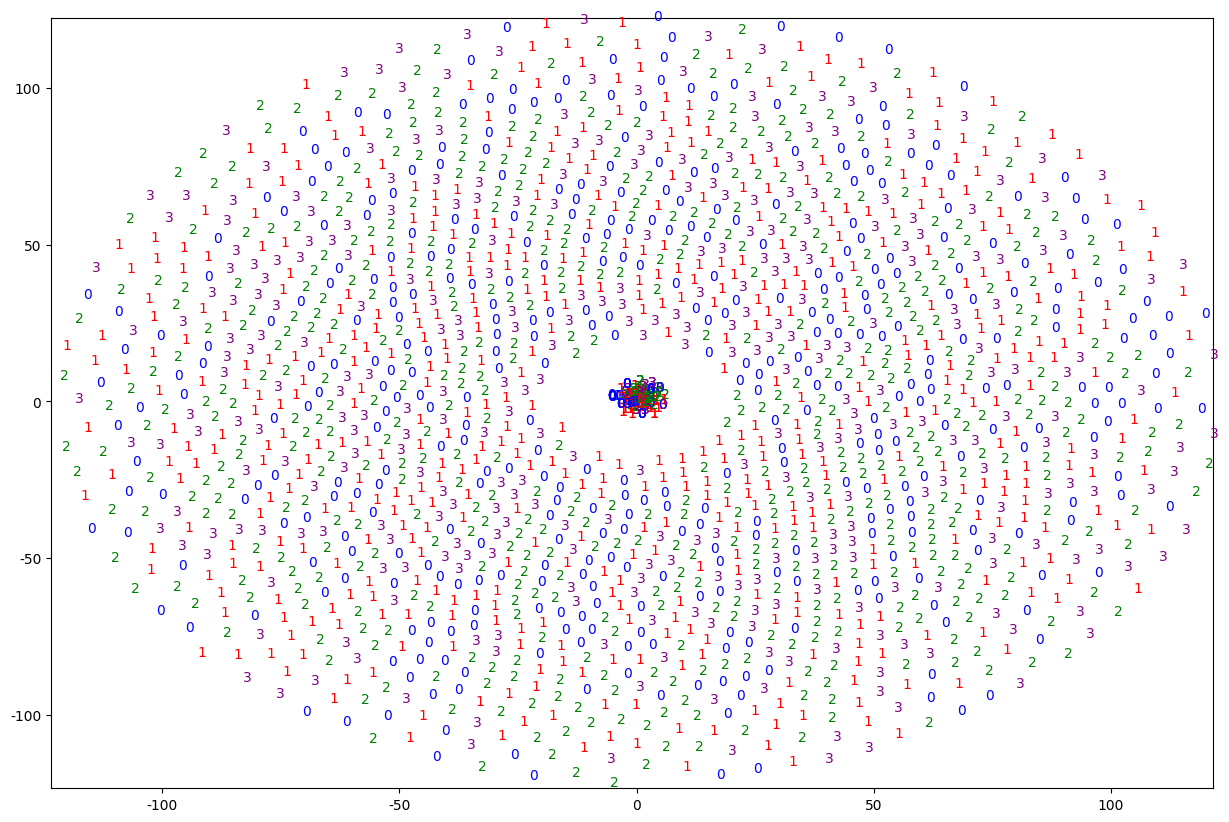

In [ ]:
tsne_graph(tsne_tfidf, y_train)

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=1) ### ... 이 부분을 완성하시오 (강의 자료를 참고하여 '???' 부분을 작성해 보시기 바랍니다.)

X_train_lsa = svd.fit_transform(X_train_tfidf)
# X_test_lsa = svd.transform(X_test_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LSA Converted X shape: (2034, 100)
Sum of explained variance ratio: 0.209


In [ ]:
tsne_lsa = tsne.fit_transform(X_train_lsa)

print('TSNE dimension:', tsne_lsa.shape)
print('#Selected categories:', newsgroups_train.target_names)

TSNE dimension: (2034, 2)
#Selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


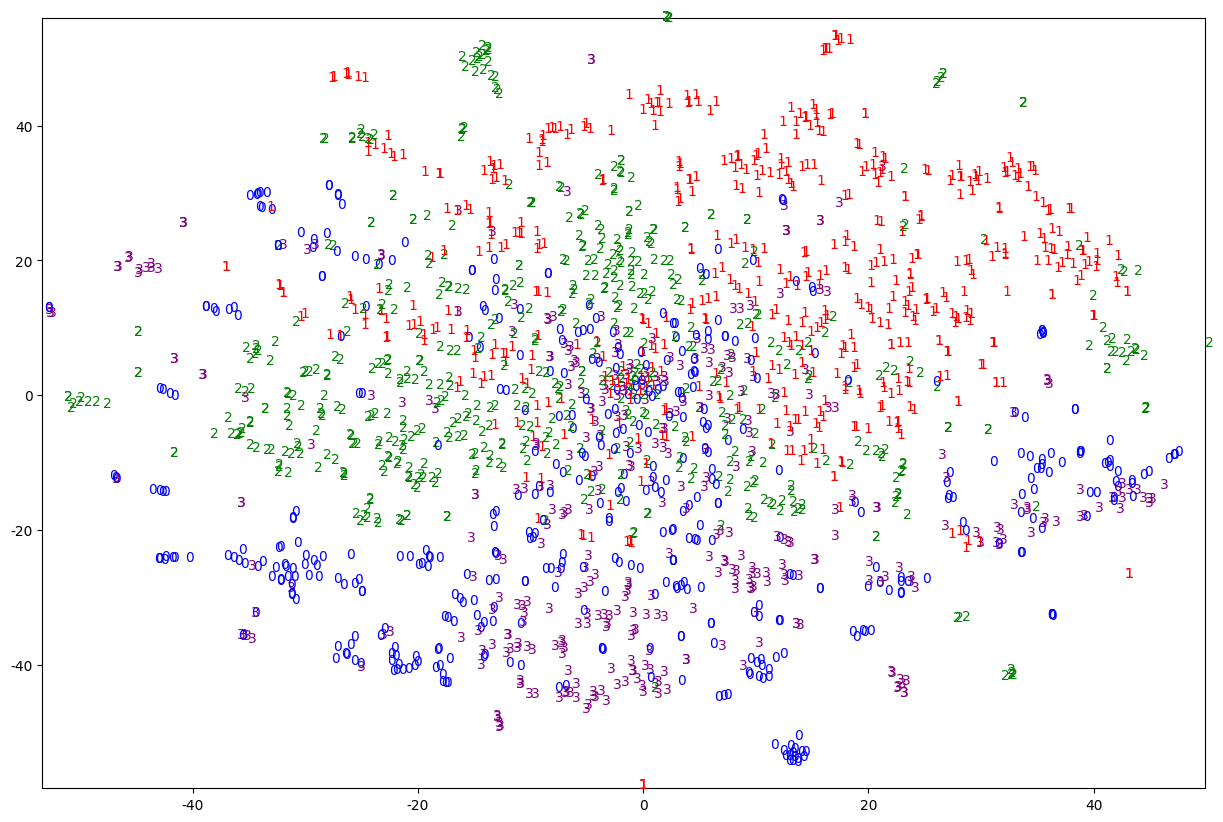

In [ ]:
tsne_graph(tsne_lsa, y_train)

---

# **[[실습 6-1-1]]** 다른 데이터 셋에 적용해보기
# 'movie_metadata.csv'의 파일을 t-SNE로 그려보기
  - LMS에서 파일('movie_metadata.csv')을 다운로드한 후, Colab에 업로드하여 진행하시기 바랍니다.
## 1. LSA 벡터를 t-SNE로 그려보기
## 2. 결과 해석하기
    - t-SNE의 결과를 보고 느낀점을 작성해 보시오.



In [ ]:
import pandas as pd
df = pd.read_csv('./movies_metadata.csv', encoding='utf-8', low_memory=False)
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [ ]:
from sklearn.model_selection import train_test_split

# vote_count 5000 이상인 영화 중에서 추천
sampled_df = df[df['vote_count'] >= 5000].reset_index(drop=True)
sampled_df.shape
# overview에 빈 값이 있는 경우, ''로 채우기
sampled_df['overview'] = sampled_df['overview'].fillna('')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(sampled_df.overview, sampled_df.title, random_state=0)

tfidf = TfidfVectorizer(max_features=2000)

X_train_tfidf = tfidf.fit_transform(X_train)

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=1)

X_train_lsa = svd.fit_transform(X_train_tfidf)

print('LSA Converted X shape:', X_train_lsa.shape)
print('Sum of explained variance ratio: {:.3f}'.format(svd.explained_variance_ratio_.sum()))

LSA Converted X shape: (75, 75)
Sum of explained variance ratio: 1.000


In [ ]:
tsne_lsa = tsne.fit_transform(X_train_lsa)
print('TSNE dimension:', tsne_lsa.shape)

TSNE dimension: (75, 2)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
def tsne_graph(tsne_2, label, lim=None):
    x = tsne_2[:,0] #압축된 첫 차원을 x축으로 이용
    y = tsne_2[:,1] #압축된 둘째 차원은 y축으로 이용
    plt.figure(figsize=(15,10))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    # for i in range(100):
    for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label.iloc[i])
    plt.show()

# 1. LSA 벡터를 t-SNE로 그려보기

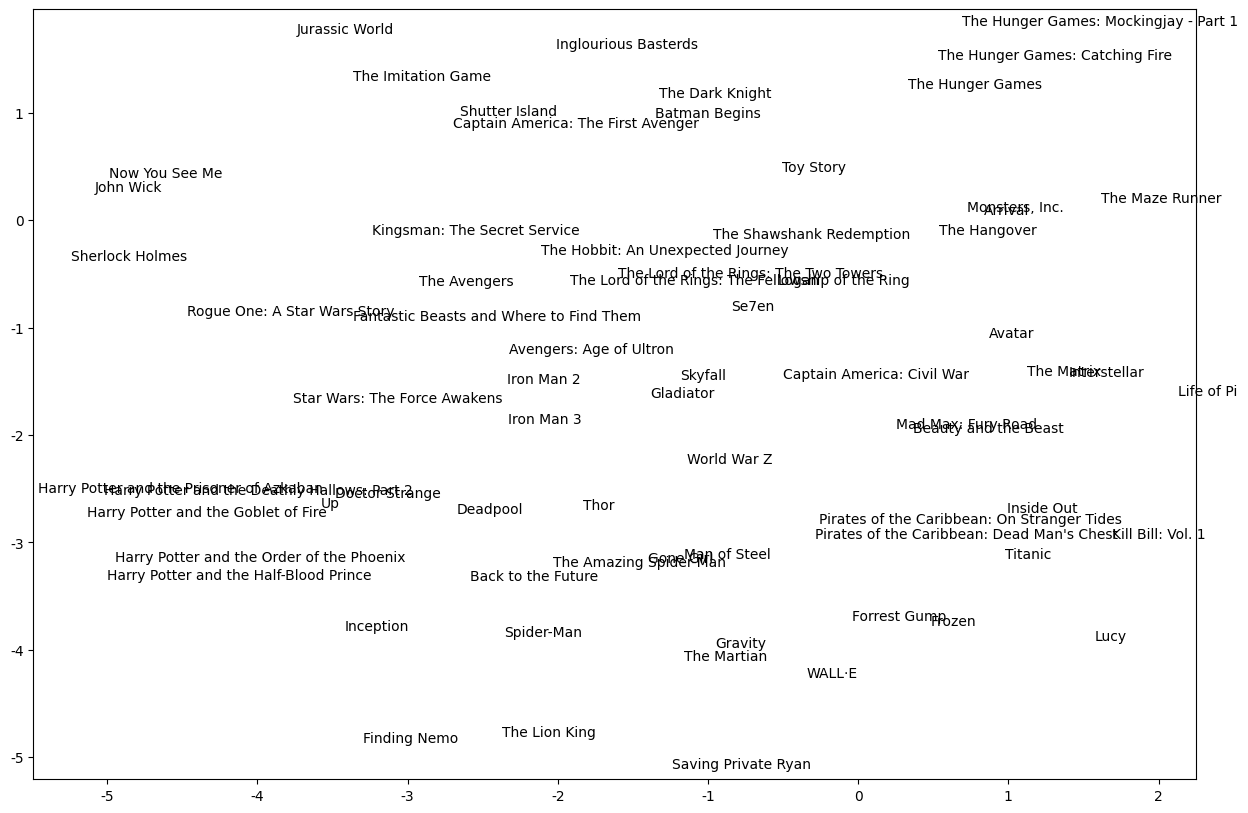

In [ ]:
# (코드 작성)
# tsne_graph(???, ???) # (???, ???)에서 ???를 채우면 t-SNE 결과가 출력됨
tsne_graph(tsne_lsa, y_train)

# 2. 결과 해석하기
  - t-SNE의 결과를 보고 느낀점을 작성해 보시오.

The Hunger Games, The Lord of the Rings, Harry Potter, Pirates of the Caribbean 등 시리즈 영화들이 비슷한 위치에 있는 것을 보면, 같은 시리즈의 영화를 서로 유사한 영화로 판단했다.

또한, "Captain America", "Iron Man", "Avengers" 등과 같은 영화들은 같은 시리즈가 아니지만 히어로라는 공통된 내용을 공유하기 때문에 서로 가까운 위치에 있다.

---

# [파일] -> [다운로드] -> [.ipynb 다운로드]